In [1]:
from dataset import CoverDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from models import get_models
import albumentations as A
import torch
from defs import *
from torchvision.utils import make_grid
from minepi import Skin
from PIL import Image
import os
import cv2
import random
import numpy as np

/root/anaconda3/envs/album/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


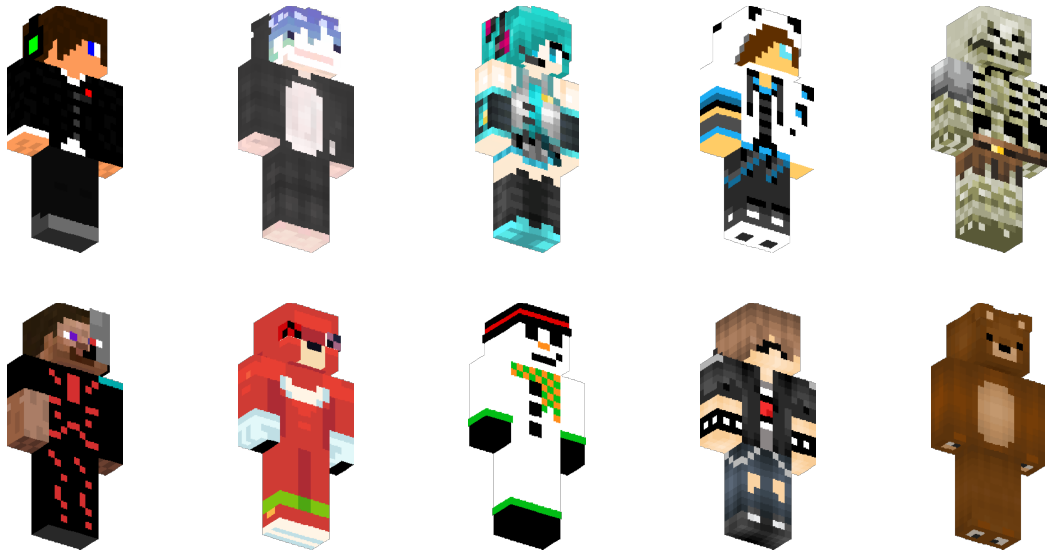

In [16]:
dataset_dir = 'data/skins'
skin_pathes = [os.path.join(dataset_dir, i) for i in os.listdir(dataset_dir)]
plt.figure(figsize=(20, 10))
d = True
for idx, i in enumerate(random.choices(skin_pathes, k=10)):
    raw_skin = Image.open(i)
    s = Skin(raw_skin=raw_skin)
    await s.render_skin(display_hair=d, display_second_layer=d, display_cape=d)
    plt.subplot(2,5, idx+1)
    plt.imshow(s.skin)
    plt.axis('off')

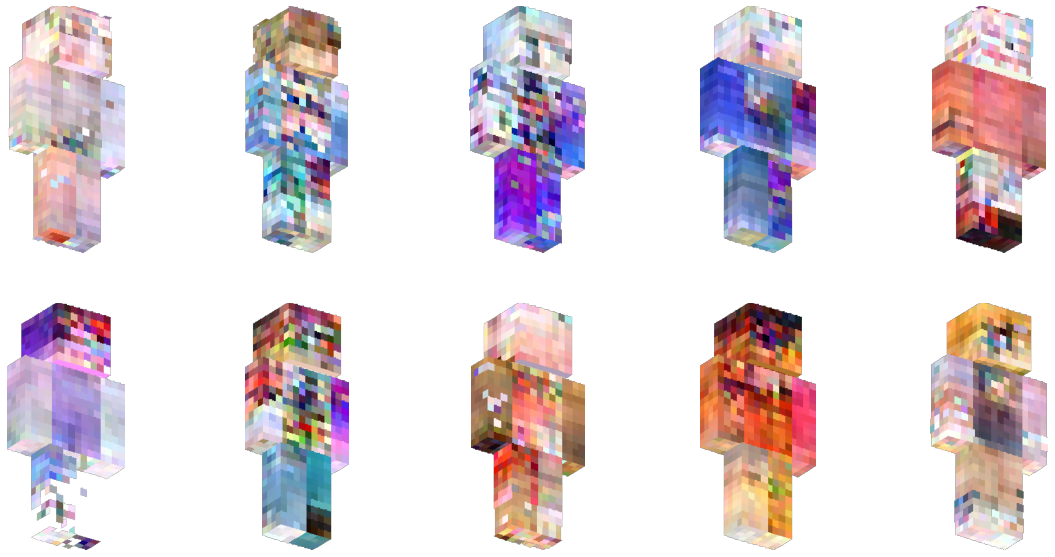

In [55]:
plt.figure(figsize=(20, 10))
path = "results/samples/0000/"
d = True
th = 0.5
for i in range(10):
    raw_skin = plt.imread(f"{path}{i}.png")
    raw_skin[..., -1] = (raw_skin[..., -1] >= th) * raw_skin[..., -1]
    raw_skin = (raw_skin * 255).astype("uint8")
    raw_skin = Image.fromarray(raw_skin)
    s = Skin(raw_skin=raw_skin)
    await s.render_skin(display_hair=d, display_second_layer=d, display_cape=d)
    plt.subplot(2,5, i+1)
    plt.imshow(s.skin)
    plt.axis('off')

In [ ]:
from diffusers.optimization import get_cosine_schedule_with_warmup
import torch

model = torch.nn.Sequential(torch.nn.Conv2d(3,3,3))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.00009)

lr_scheduler = get_cosine_schedule_with_warmup(
    optimizer=optimizer,
    num_warmup_steps=int(3585 * 0.01),
    num_training_steps=(3585 * 10),)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
lrs = []
for i in range(50):
    for j in range(3585):
        lrs.append(optimizer.param_groups[0]['lr'])
        lr_scheduler.step()

[]

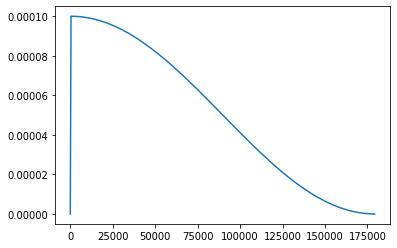

In [ ]:
plt.plot(list(range(50*3585)), lrs)
plt.plot()

In [2]:
dataset = CoverDataset(DATA_PATH, IMSIZE, None, True, True)
train_dataloader = DataLoader(
    dataset, batch_size=64, shuffle=False, drop_last=True
)

Loading dataset: 100%|██████████| 100/100 [00:00<00:00, 947.54it/s]


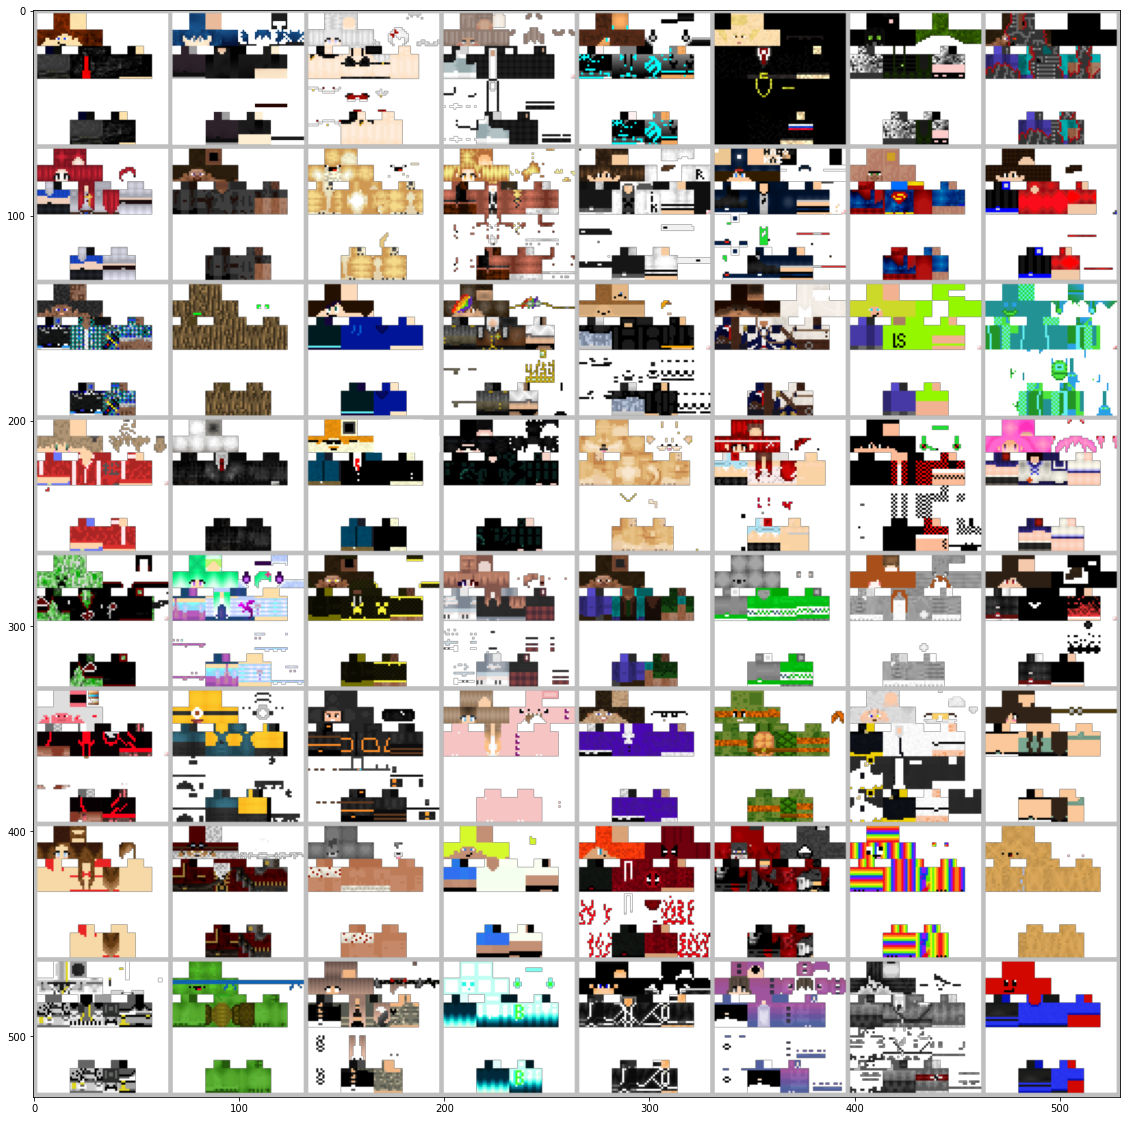

In [3]:
a = next(iter(train_dataloader))
plt.figure(figsize=(20,20))
plt.imshow((make_grid(a, 8).permute(1,2,0)+1)/2)

In [4]:
b = a[-10].permute(1,2,0)

In [4]:
torch.unique(a[3][-1])

tensor([-1.0000, -0.4980,  1.0000])

In [ ]:
from diffusers import DDPMScheduler, DDPMPipeline
from evaluate import evaluate
DEVICE = 'cuda:2'
model = get_models(IMSIZE).to(DEVICE)

In [ ]:
model = model.from_pretrained('results/weights/unet')
model = model.to(DEVICE)
model.train()
noise_scheduler = DDPMScheduler(num_train_timesteps=NUM_TRAIN_TIMESTEPS)

In [ ]:
EVAL_BATCH_SIZE = 36
pipeline = DDPMPipeline(unet=model, scheduler=noise_scheduler)
evaluate(1000000, pipeline, size = 64)


  1%|          | 9/1000 [00:06<11:54,  1.39it/s]


KeyboardInterrupt: 

In [ ]:
model.training

True

In [ ]:
pipeline.unet.training

True